In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_json("exps.jsonl", lines=True)
print(len(df))
df.head()

72


,id,name,params.dataset.path,params.dataset.name,params.dataset.split,params.qa.model,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,...,params.run,metrics.exact_match,metrics.f1,metrics.2hops.exact_match,metrics.2hops.f1,metrics.3hops.exact_match,metrics.3hops.f1,metrics.4hops.exact_match,metrics.4hops.f1,params.qa.technique
0,5bf0f42a3be03329be9d148689ff94f29ae6eebe,irate-cons,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.1,cot/original.txt,cq.txt,semi/cot-original.json,...,2,0.603333,0.703349,0.71,0.818810,0.58,0.670333,0.52,0.620905,cot
1,d2c8585fee2c6e986a2e02f1cddc2f647afe5798,eager-toga,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.1,ccot/original.txt,cq.txt,semi/ccot-original.json,...,1,0.640000,0.748900,0.71,0.821185,0.60,0.698032,0.61,0.727485,ccot
2,cce419f025b20f023080ef7d46cf39a9f713d236,barky-buoy,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.1,cot/format-thought.txt,cq.txt,semi/cot.json,...,3,0.626667,0.728144,0.70,0.809113,0.59,0.673722,0.59,0.701596,cot
3,344ae1feba339068949157dfbfe5475880fde429,gouty-mate,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.1,cot/format-thought.txt,cq.txt,semi/cot.json,...,1,0.636667,0.736496,0.72,0.814165,0.57,0.671056,0.62,0.724267,cot
4,bd59c4d52f4609626d0e126ae6053e25cf333ec3,lippy-food,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.1,ccot/format-thought.txt,cq.txt,semi/ccot.json,...,2,0.653333,0.754578,0.71,0.820208,0.62,0.714222,0.63,0.729303,ccot


In [3]:
param_cols = [col for col in df.columns if col.startswith("params.")]
metric_cols = [col for col in df.columns if col.startswith("metrics.")]
df.drop(
    columns=[
        "id",
        "params.dataset.path",
        "params.dataset.name",
        "params.dataset.split",
        "params.qa.model",
    ],
    inplace=True,
)

In [4]:
target_param_cols = [
    "params.qa.technique",
    "params.qa.system_prompt",
    "params.qa.user_prompt_template",
    "params.qa.few_shot_examples",
    "params.qa.n_shot",
    "params.qa.temperature",
]
df = df.sort_values(target_param_cols + ["params.run"])
df.reset_index(drop=True, inplace=True)
df.head()

,name,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.run,metrics.exact_match,metrics.f1,metrics.2hops.exact_match,metrics.2hops.f1,metrics.3hops.exact_match,metrics.3hops.f1,metrics.4hops.exact_match,metrics.4hops.f1,params.qa.technique
0,minus-scab,0.1,ccot/format-thought.txt,cq.txt,semi/ccot.json,0,1,0.646667,0.745449,0.70,0.806764,0.60,0.694222,0.64,0.735360,ccot
1,lippy-food,0.1,ccot/format-thought.txt,cq.txt,semi/ccot.json,0,2,0.653333,0.754578,0.71,0.820208,0.62,0.714222,0.63,0.729303,ccot
2,snide-iglu,0.1,ccot/format-thought.txt,cq.txt,semi/ccot.json,0,3,0.656667,0.747483,0.71,0.813859,0.61,0.693722,0.65,0.734867,ccot
3,direr-ruin,0.1,ccot/format-thought.txt,cq.txt,semi/ccot.json,1,1,0.643333,0.738657,0.73,0.819452,0.64,0.723397,0.56,0.673121,ccot
4,macro-sima,0.1,ccot/format-thought.txt,cq.txt,semi/ccot.json,1,2,0.650000,0.742611,0.74,0.831595,0.63,0.713825,0.58,0.682413,ccot


In [5]:
run_counts = df.groupby(target_param_cols)["params.run"].aggregate(tuple).reset_index()
mask = run_counts["params.run"].map(len) != 3
run_counts.loc[mask]

,params.qa.technique,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.qa.temperature,params.run


In [6]:
def remove_ext(filename):
    return filename.split(".", 1)[0]

df["params.qa.system_prompt"] = df["params.qa.system_prompt"].map(remove_ext)
df["params.qa.user_prompt_template"] = df["params.qa.user_prompt_template"].map(remove_ext)
df["params.qa.few_shot_examples"] = df["params.qa.few_shot_examples"].map(remove_ext)

In [7]:
df['params.qa.system_prompt'].unique()

array(['ccot/format-thought', 'ccot/original', 'cot/format-thought',
       'cot/original', 'cte/format-triplets-few', 'direct/format-few'],
      dtype=object)

In [8]:
df = df[df['params.run']==2]

In [9]:
avg_df = df.groupby(target_param_cols)[metric_cols].max().reset_index()
avg_df.head()

,params.qa.technique,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.qa.temperature,metrics.exact_match,metrics.f1,metrics.2hops.exact_match,metrics.2hops.f1,metrics.3hops.exact_match,metrics.3hops.f1,metrics.4hops.exact_match,metrics.4hops.f1
0,ccot,ccot/format-thought,cq,semi/ccot,0,0.1,0.653333,0.754578,0.71,0.820208,0.62,0.714222,0.63,0.729303
1,ccot,ccot/format-thought,cq,semi/ccot,1,0.1,0.650000,0.742611,0.74,0.831595,0.63,0.713825,0.58,0.682413
2,ccot,ccot/format-thought,cq,semi/ccot,2,0.1,0.666667,0.760572,0.70,0.794738,0.67,0.746603,0.63,0.740375
3,ccot,ccot/format-thought,cq,semi/ccot,3,0.1,0.663333,0.770955,0.71,0.821310,0.64,0.739984,0.64,0.751571
4,ccot,ccot/original,cq,semi/ccot-original,0,0.1,0.646667,0.751097,0.69,0.808492,0.63,0.714095,0.62,0.730703


In [10]:
# find the rows with max f1 score for each technique group
max_f1_rows = avg_df.groupby('params.qa.technique')["metrics.f1"].idxmax()
best_df = avg_df.loc[max_f1_rows, target_param_cols + metric_cols].sort_values('metrics.f1', ascending=False)
best_df

,params.qa.technique,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.qa.temperature,metrics.exact_match,metrics.f1,metrics.2hops.exact_match,metrics.2hops.f1,metrics.3hops.exact_match,metrics.3hops.f1,metrics.4hops.exact_match,metrics.4hops.f1
18,cte,cte/format-triplets-few,cq,semi/cte,2,0.1,0.716667,0.794464,0.80,0.863306,0.70,0.755846,0.65,0.764242
11,cot,cot/format-thought,cq,semi/cot,3,0.1,0.663333,0.775215,0.73,0.842024,0.63,0.737960,0.63,0.745662
23,direct,direct/format-few,cq,semi/direct,3,0.1,0.676667,0.774026,0.73,0.827643,0.66,0.742278,0.64,0.752156
3,ccot,ccot/format-thought,cq,semi/ccot,3,0.1,0.663333,0.770955,0.71,0.821310,0.64,0.739984,0.64,0.751571


## Visualizations

In [11]:
def prepare_data(dataf):
    # Simplify column names for use in formula
    dataf = dataf[target_param_cols + ['params.run'] + metric_cols[:2]].rename(
        columns={
            col: col.replace("params.qa.", "").replace("params.", "").replace("metrics.", "")
            for col in dataf.columns
        }
    )

    # Combine prompts into a single column for simplicity
    dataf["prompt"] = (
        dataf["system_prompt"]
        + " | "
        + dataf["user_prompt_template"]
        + " | "
        + dataf["n_shot"].map(str)
    )

    return dataf


In [12]:
def plot_variance(dataf, x='temperature', y='f1', hue='prompt', technique=None, figsize=(12, 8), legend='auto', legend_loc='lower left'):  
    if technique:
        dataf = dataf[dataf['technique'] == technique]
    plt.figure(figsize=figsize)
    sns.lineplot(x=x, y=y, hue=hue, data=dataf, linewidth=2.5, legend=legend)
    plt.xlabel(x.title())
    plt.ylabel(y.title())
    if legend:
        plt.legend(loc=legend_loc)
    plt.tight_layout()
    plt.show()

In [13]:
prepared_df = prepare_data(df)
zero_shot_mask = prepared_df["n_shot"] == 0
prepared_df

,technique,system_prompt,user_prompt_template,few_shot_examples,n_shot,temperature,run,exact_match,f1,prompt
1,ccot,ccot/format-thought,cq,semi/ccot,0,0.1,2,0.653333,0.754578,ccot/format-thought | cq | 0
4,ccot,ccot/format-thought,cq,semi/ccot,1,0.1,2,0.650000,0.742611,ccot/format-thought | cq | 1
7,ccot,ccot/format-thought,cq,semi/ccot,2,0.1,2,0.666667,0.760572,ccot/format-thought | cq | 2
10,ccot,ccot/format-thought,cq,semi/ccot,3,0.1,2,0.663333,0.770955,ccot/format-thought | cq | 3
13,ccot,ccot/original,cq,semi/ccot-original,0,0.1,2,0.646667,0.751097,ccot/original | cq | 0
16,ccot,ccot/original,cq,semi/ccot-original,1,0.1,2,0.656667,0.757170,ccot/original | cq | 1
19,ccot,ccot/original,cq,semi/ccot-original,2,0.1,2,0.653333,0.751754,ccot/original | cq | 2
22,ccot,ccot/original,cq,semi/ccot-original,3,0.1,2,0.663333,0.767704,ccot/original | cq | 3
25,cot,cot/format-thought,cq,semi/cot,0,0.1,2,0.630000,0.728159,cot/format-thought | cq | 0
28,cot,cot/format-thought,cq,semi/cot,1,0.1,2,0.683333,0.769566,cot/format-thought | cq | 1


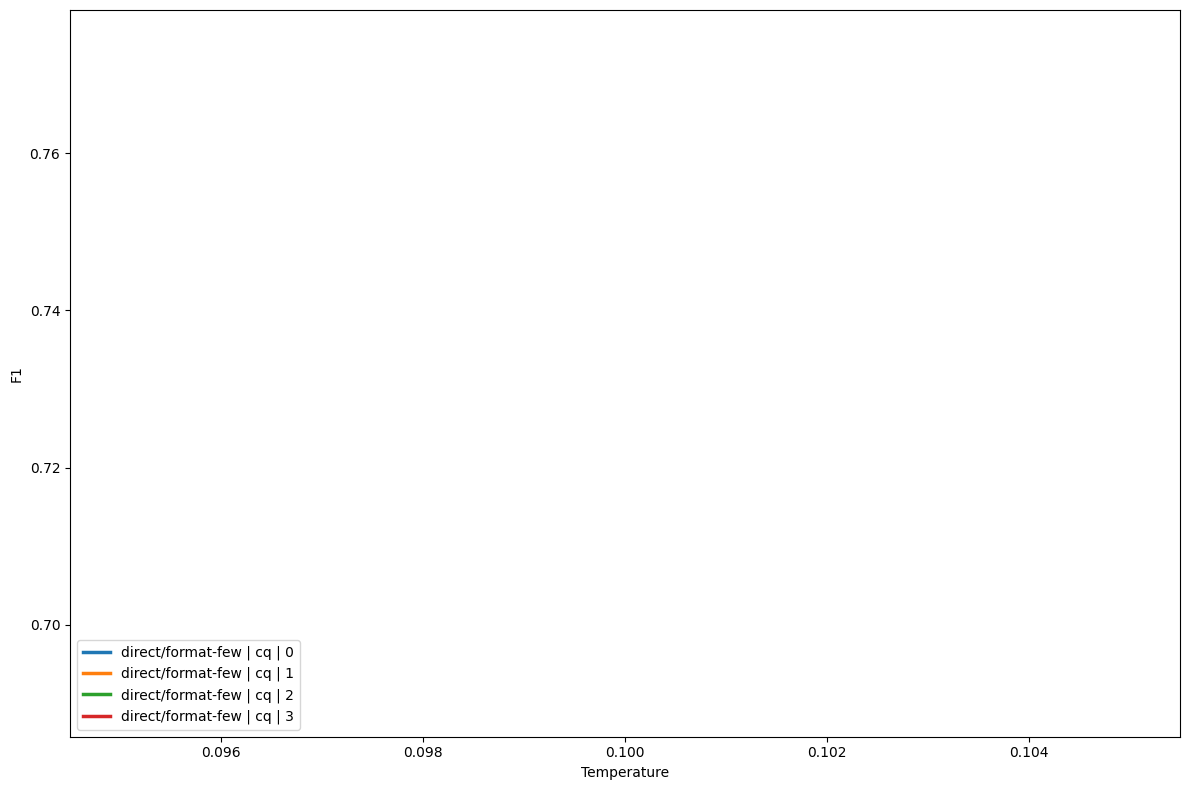

In [14]:
plot_variance(prepared_df, technique='direct', legend='brief')

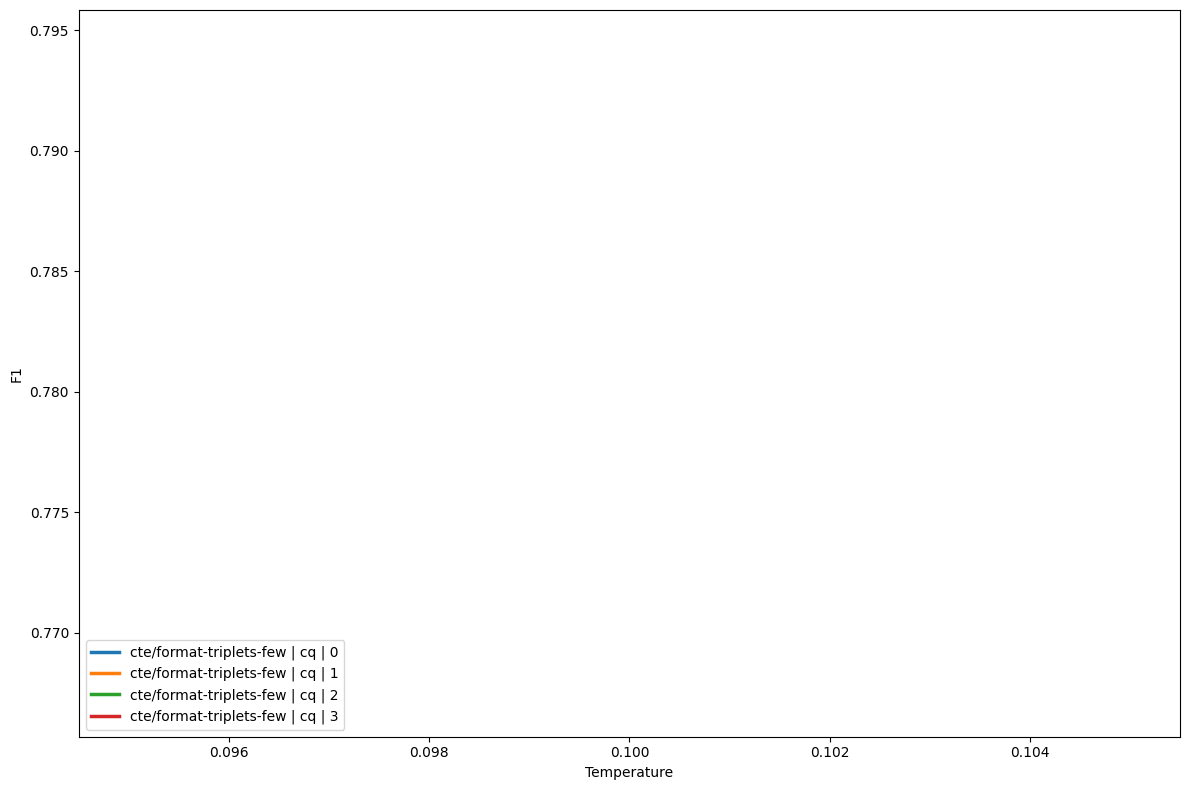

In [15]:
plot_variance(prepared_df, technique='cte', legend='brief')

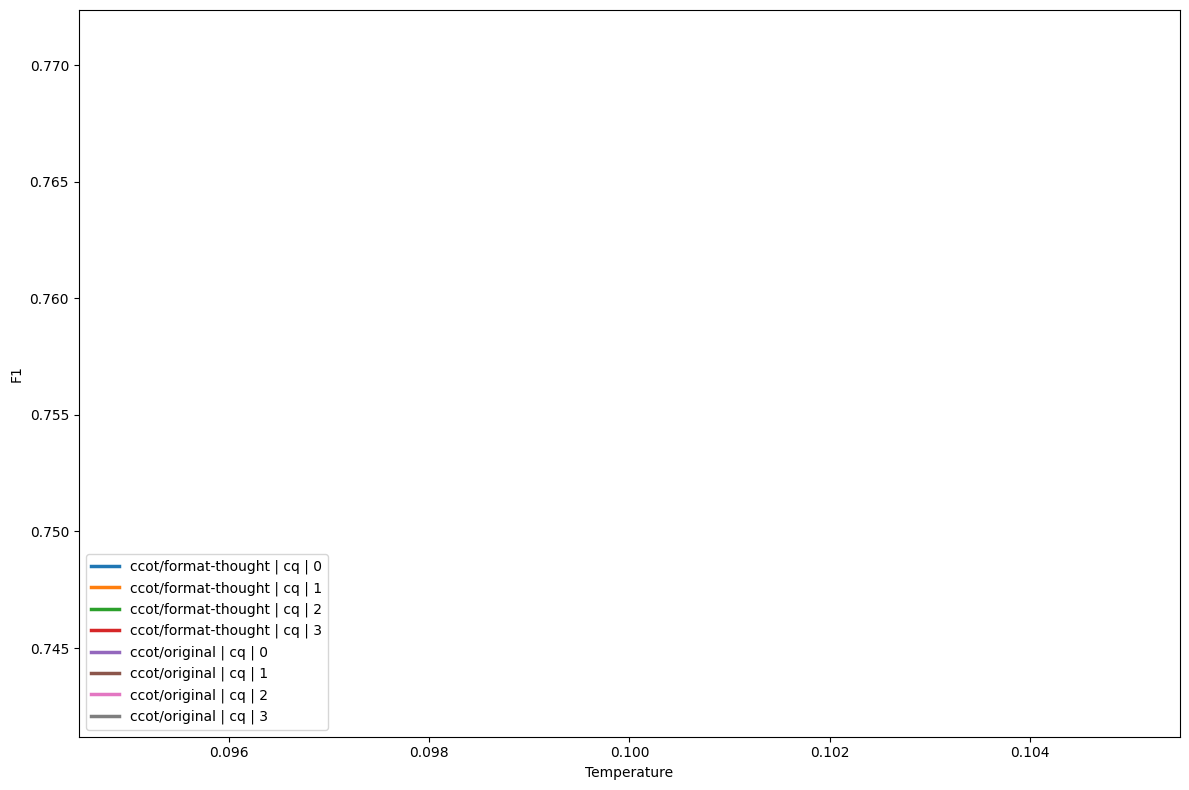

In [16]:
plot_variance(prepared_df, technique='ccot', legend='brief')

In [17]:
best_df['params.run'] = 0
best_prompts = prepare_data(best_df).prompt.values.tolist()
_data = prepared_df.copy()
prompt_mask = _data['prompt'].isin(best_prompts)
best_prepared_df = _data.loc[prompt_mask]
best_prepared_df

,technique,system_prompt,user_prompt_template,few_shot_examples,n_shot,temperature,run,exact_match,f1,prompt
10,ccot,ccot/format-thought,cq,semi/ccot,3,0.1,2,0.663333,0.770955,ccot/format-thought | cq | 3
34,cot,cot/format-thought,cq,semi/cot,3,0.1,2,0.663333,0.775215,cot/format-thought | cq | 3
55,cte,cte/format-triplets-few,cq,semi/cte,2,0.1,2,0.716667,0.794464,cte/format-triplets-few | cq | 2
70,direct,direct/format-few,cq,semi/direct,3,0.1,2,0.676667,0.774026,direct/format-few | cq | 3


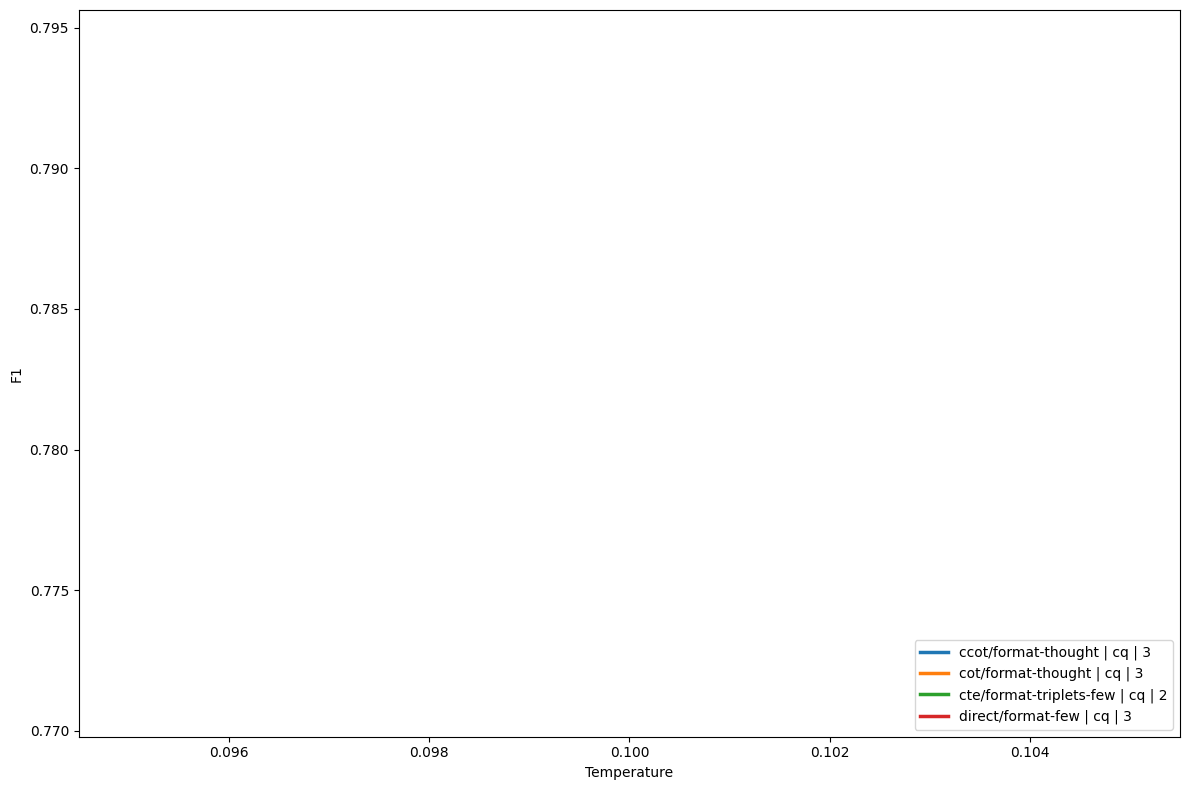

In [18]:
plot_variance(best_prepared_df, figsize=(12, 8), legend_loc='lower right')

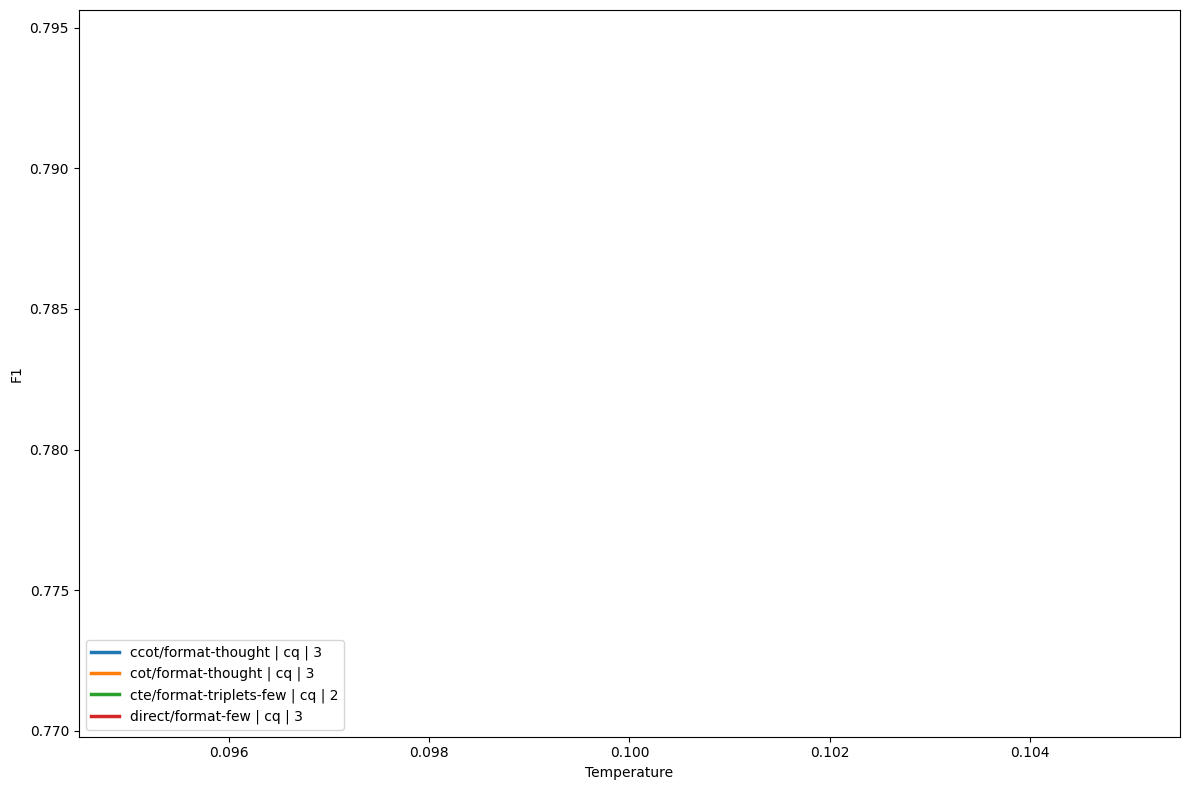

In [19]:
plot_variance(best_prepared_df, figsize=(12, 8), legend_loc='lower left')

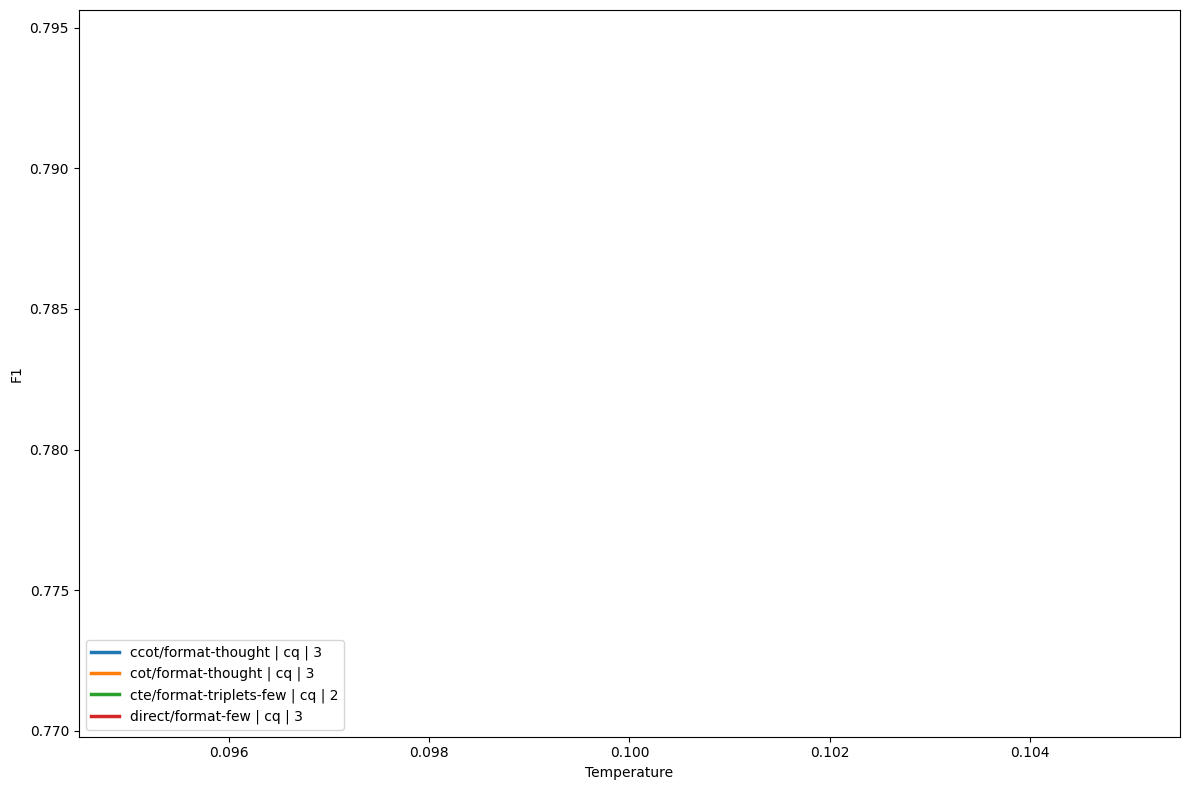

In [20]:
plot_variance(best_prepared_df[best_prepared_df['temperature'] <= 1.0], figsize=(12, 8), legend_loc='lower left')

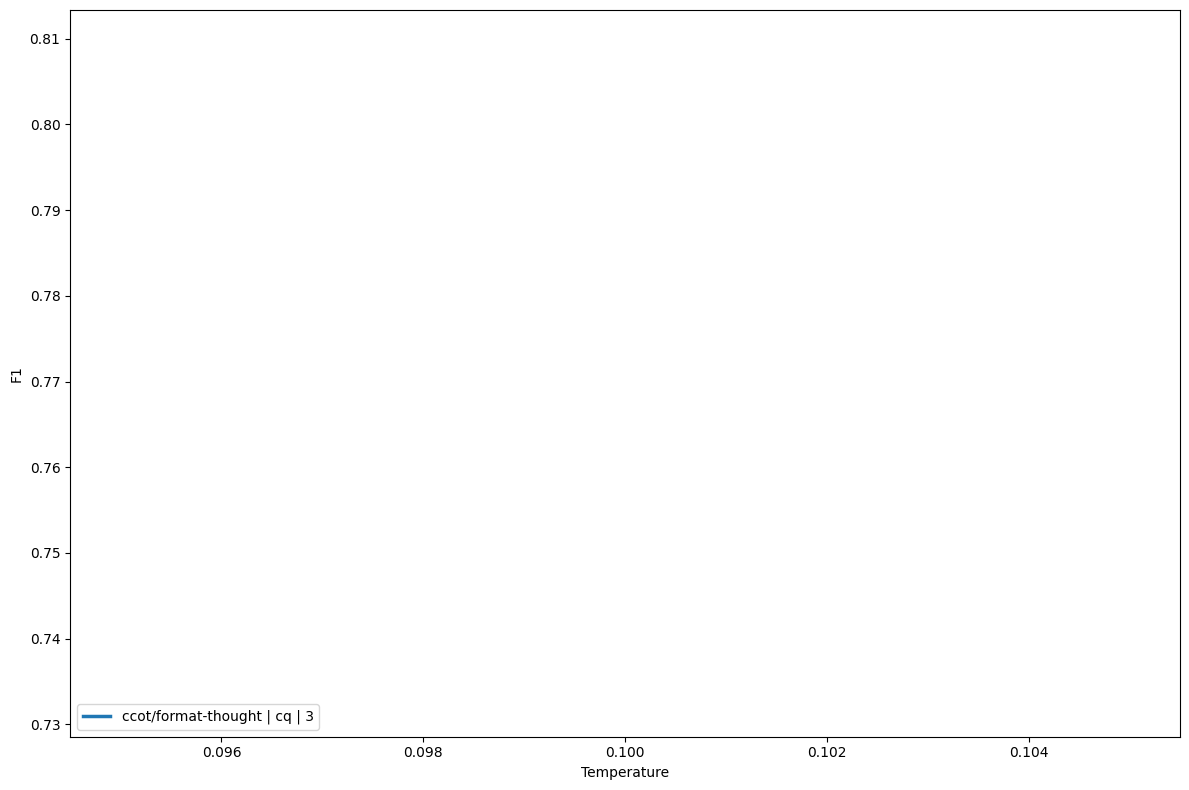

In [21]:
plot_variance(best_prepared_df[best_prepared_df['temperature'] <= 1.0], technique='ccot', figsize=(12, 8), legend_loc='lower left')

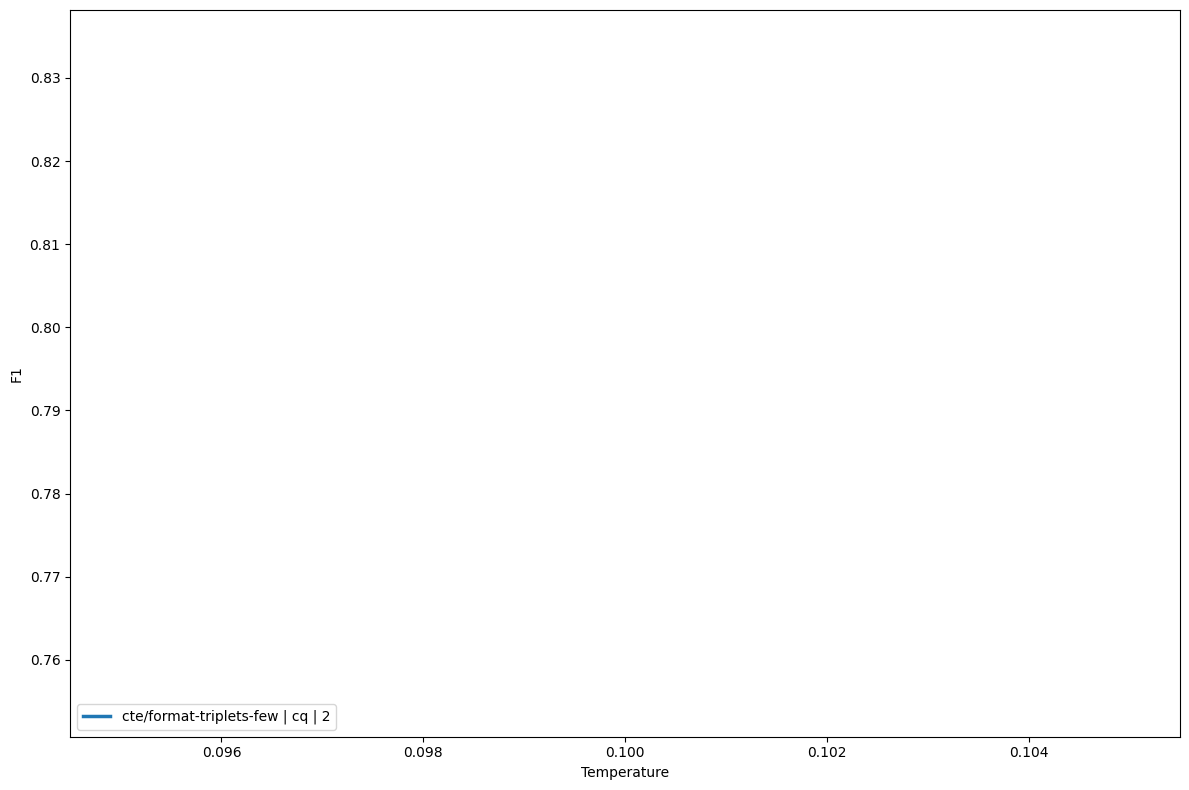

In [22]:
plot_variance(best_prepared_df[best_prepared_df['temperature'] <= 1.0], technique='cte', figsize=(12, 8), legend_loc='lower left')

## Inspect

In [23]:
# # box-whisker plot
# plt.figure(figsize=(12, 8))
# sns.boxplot(
#     x="prompt",
#     y="f1",
#     data=prepared_df.sort_values(by="f1"),
# )
# plt.xticks(rotation=60, ha="right");

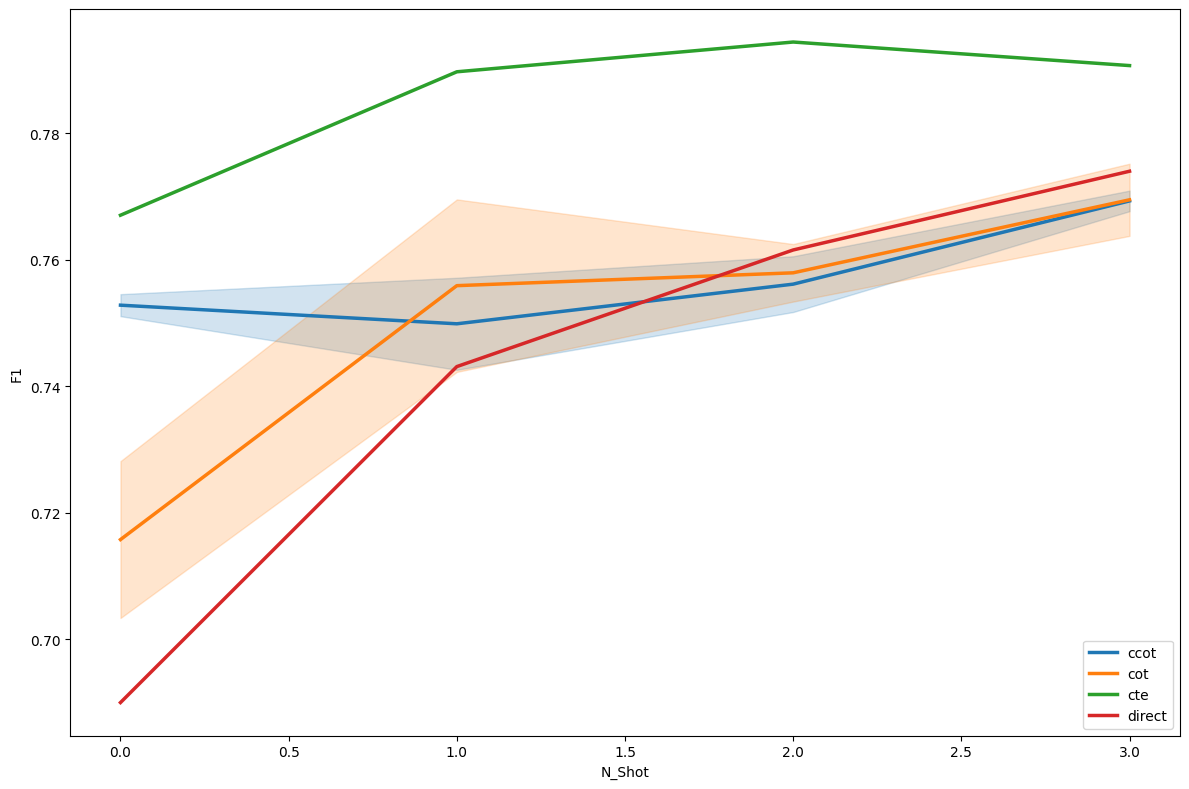

In [24]:
plot_variance(prepared_df[prepared_df['temperature'] == 0.1], x='n_shot', hue='technique', figsize=(12, 8), legend_loc='lower right')

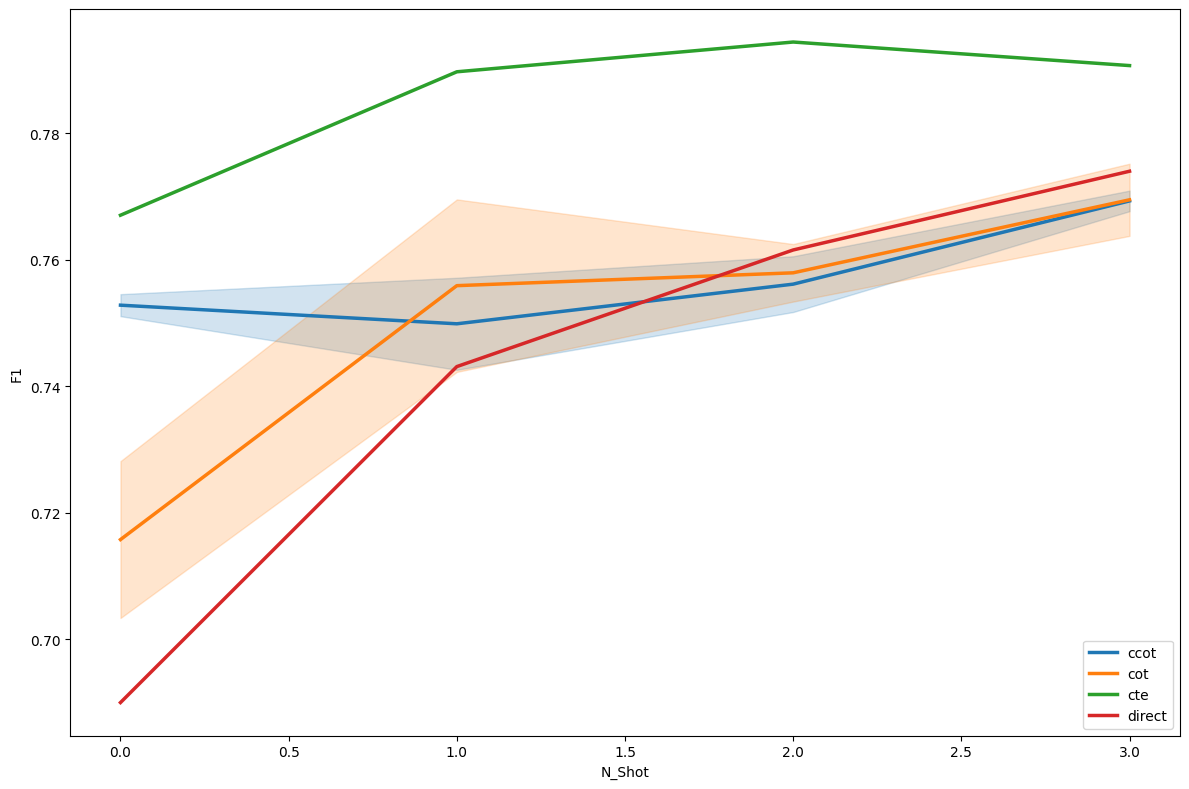

In [25]:
plot_variance(prepared_df[prepared_df['temperature'] < 1.0], x='n_shot', hue='technique', figsize=(12, 8), legend_loc='lower right')

In [26]:
df

,name,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.run,metrics.exact_match,metrics.f1,metrics.2hops.exact_match,metrics.2hops.f1,metrics.3hops.exact_match,metrics.3hops.f1,metrics.4hops.exact_match,metrics.4hops.f1,params.qa.technique
1,lippy-food,0.1,ccot/format-thought,cq,semi/ccot,0,2,0.653333,0.754578,0.71,0.820208,0.62,0.714222,0.63,0.729303,ccot
4,macro-sima,0.1,ccot/format-thought,cq,semi/ccot,1,2,0.650000,0.742611,0.74,0.831595,0.63,0.713825,0.58,0.682413,ccot
7,prize-yoke,0.1,ccot/format-thought,cq,semi/ccot,2,2,0.666667,0.760572,0.70,0.794738,0.67,0.746603,0.63,0.740375,ccot
10,funny-chow,0.1,ccot/format-thought,cq,semi/ccot,3,2,0.663333,0.770955,0.71,0.821310,0.64,0.739984,0.64,0.751571,ccot
13,hoven-jiao,0.1,ccot/original,cq,semi/ccot-original,0,2,0.646667,0.751097,0.69,0.808492,0.63,0.714095,0.62,0.730703,ccot
16,webby-harl,0.1,ccot/original,cq,semi/ccot-original,1,2,0.656667,0.757170,0.75,0.830119,0.63,0.723270,0.59,0.718121,ccot
19,idled-cogs,0.1,ccot/original,cq,semi/ccot-original,2,2,0.653333,0.751754,0.71,0.807738,0.66,0.732762,0.59,0.714762,ccot
22,dosed-bite,0.1,ccot/original,cq,semi/ccot-original,3,2,0.663333,0.767704,0.70,0.808731,0.65,0.743952,0.64,0.750429,ccot
25,taunt-glen,0.1,cot/format-thought,cq,semi/cot,0,2,0.630000,0.728159,0.72,0.822916,0.58,0.665127,0.59,0.696434,cot
28,telic-tors,0.1,cot/format-thought,cq,semi/cot,1,2,0.683333,0.769566,0.77,0.843214,0.65,0.731937,0.63,0.733548,cot


In [27]:
mask = (df['params.run'] == 2) & (df['params.qa.temperature'] == 0.1)
df.loc[mask].sort_values('metrics.f1', ascending=False)

,name,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.run,metrics.exact_match,metrics.f1,metrics.2hops.exact_match,metrics.2hops.f1,metrics.3hops.exact_match,metrics.3hops.f1,metrics.4hops.exact_match,metrics.4hops.f1,params.qa.technique
55,leafy-waft,0.1,cte/format-triplets-few,cq,semi/cte,2,2,0.716667,0.794464,0.80,0.863306,0.70,0.755846,0.65,0.764242,cte
58,rathe-soft,0.1,cte/format-triplets-few,cq,semi/cte,3,2,0.696667,0.790737,0.75,0.840782,0.70,0.770006,0.64,0.761424,cte
52,azure-arks,0.1,cte/format-triplets-few,cq,semi/cte,1,2,0.716667,0.789756,0.78,0.845960,0.72,0.777322,0.65,0.745984,cte
34,freed-fils,0.1,cot/format-thought,cq,semi/cot,3,2,0.663333,0.775215,0.73,0.842024,0.63,0.737960,0.63,0.745662,cot
70,cross-coof,0.1,direct/format-few,cq,semi/direct,3,2,0.676667,0.774026,0.73,0.827643,0.66,0.742278,0.64,0.752156,direct
10,funny-chow,0.1,ccot/format-thought,cq,semi/ccot,3,2,0.663333,0.770955,0.71,0.821310,0.64,0.739984,0.64,0.751571,ccot
28,telic-tors,0.1,cot/format-thought,cq,semi/cot,1,2,0.683333,0.769566,0.77,0.843214,0.65,0.731937,0.63,0.733548,cot
22,dosed-bite,0.1,ccot/original,cq,semi/ccot-original,3,2,0.663333,0.767704,0.70,0.808731,0.65,0.743952,0.64,0.750429,ccot
49,murky-iota,0.1,cte/format-triplets-few,cq,semi/cte,0,2,0.683333,0.767067,0.76,0.850539,0.66,0.717222,0.63,0.733438,cte
46,gluey-crag,0.1,cot/original,cq,semi/cot-original,3,2,0.656667,0.763795,0.73,0.834929,0.62,0.730460,0.62,0.725996,cot
